In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

sns.set(style="darkgrid")

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
   print('User uploaded file "{name}" with length {length} bytes'.format(
       name=fn, length=len(uploaded[fn])))

data = pd.read_csv("train.csv")
data.tail()

KeyboardInterrupt: ignored

In [ ]:
data.shape

(1460, 81)

In [ ]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
from sklearn.model_selection import train_test_split

data = data.drop(columns=["Id"])

y = data["SalePrice"]
X = data.drop(columns=["SalePrice"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

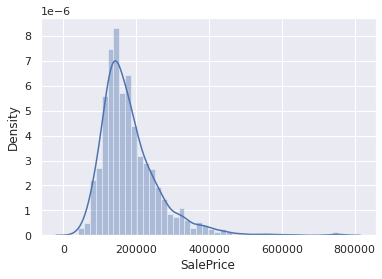

In [ ]:
sns.distplot(y_train)

In [ ]:
# Обучите линейную регрессию (LinearRegression, Ridge, Lasso) на числовых признаках из нашего датасета
# TO DO

from sklearn import linear_model
from sklearn.metrics import mean_squared_error

num_features = data.select_dtypes(include=np.number).columns.tolist()
X_nf = data[num_features].drop(columns=["SalePrice"])
num_features = X_nf.columns
X_nf = X_nf.fillna(method='ffill')
X_nf.isna().mean()

X_train_nf, X_test_nf, y_train_nf, y_test_nf = train_test_split(X_nf, y, test_size=0.3, random_state=10)

lr = linear_model.LinearRegression()
lr.fit(X_train_nf, y_train_nf)
print ("LinearRegression:", lr.score(X_test_nf, y_test_nf))
print ("LR RMSE:", np.sqrt(mean_squared_error(lr.predict(X_test_nf), y_test_nf)))

rid = linear_model.Ridge()
rid.fit(X_train_nf, y_train_nf)
print ("Ridge:", rid.score(X_test_nf, y_test_nf))
print ("Ridge RMSE:", np.sqrt(mean_squared_error(rid.predict(X_test_nf), y_test_nf)))

lasso = linear_model.Lasso()
lasso.fit(X_train_nf, y_train_nf)
print ("Lasso:", lasso.score(X_test_nf, y_test_nf))
print ("Lasso RMSE:", np.sqrt(mean_squared_error(lasso.predict(X_test_nf), y_test_nf)))

LinearRegression: 0.8240530264920545
LR RMSE: 32105.63123711505
Ridge: 0.8241760908934096
Ridge RMSE: 32094.401287164954
Lasso: 0.8240673393450961
Lasso RMSE: 32104.325353534907


$$\text{RMSE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} (y_i - a(x_i))^2}$$

In [ ]:
# Определите RMSE через функцию sklearn.metrics.make_scorer
# TO DO

from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate

def rmse(y, y_first):
    return np.sqrt( np.mean( np.square(y - y_first) ) )

cross_validate(linear_model.Lasso(),
              X_nf, y, cv=7,
              scoring = {'RMSE': make_scorer(rmse)})

{'fit_time': array([0.0109129 , 0.0098772 , 0.0102911 , 0.01008844, 0.00987935,
        0.01221895, 0.00993991]),
 'score_time': array([0.00459027, 0.00403428, 0.00434279, 0.00399661, 0.0042851 ,
        0.00531077, 0.00399923]),
 'test_RMSE': array([29343.8645144 , 27637.89602794, 37199.89571716, 40545.71620776,
        28073.2874923 , 43468.77545936, 55400.41777115])}

In [ ]:
def show_weights(features, weights, scales):
    fig, axs = plt.subplots(figsize=(14, 10), ncols=2)
    sorted_weights = sorted(zip(weights, features, scales), reverse=True)
    weights = [x[0] for x in sorted_weights]
    features = [x[1] for x in sorted_weights]
    scales = [x[2] for x in sorted_weights]
    sns.barplot(y=features, x=weights, ax=axs[0])
    axs[0].set_xlabel("Weight")
    sns.barplot(y=features, x=scales, ax=axs[1])
    axs[1].set_xlabel("Scale")
    plt.tight_layout()

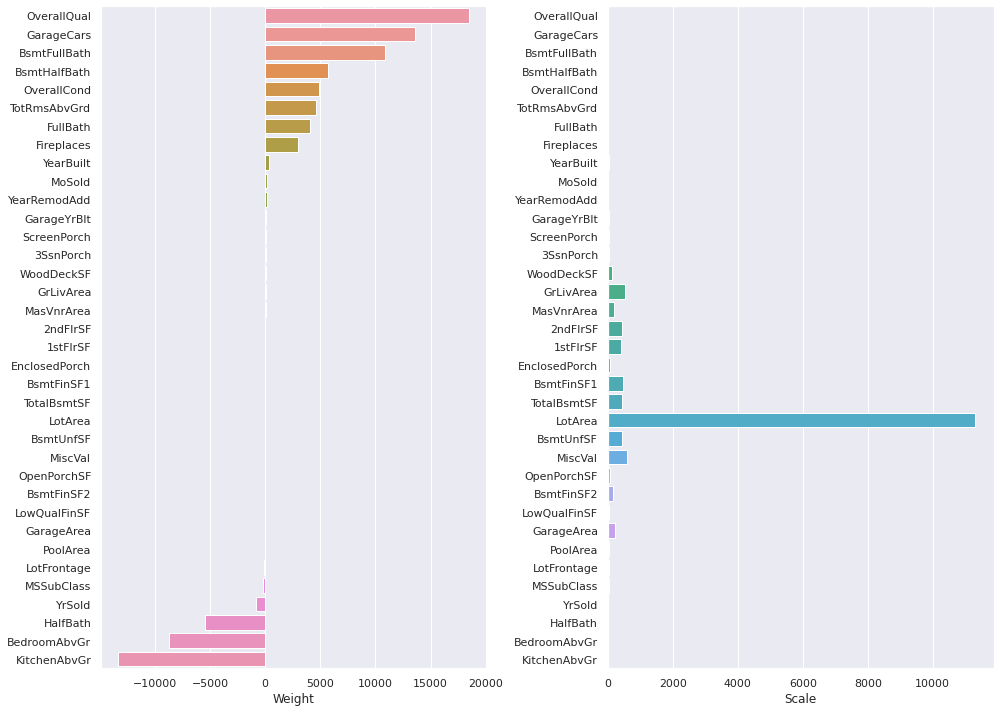

In [ ]:
show_weights(num_features, lr.coef_, X_train[num_features].std())

In [ ]:
# Отмасштабируйте признаки перед обучением модели, воспользуясь трансформером StandardScaler
# TO DO

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

sc.fit(X_train_nf)
X_train_sc = sc.transform(X_train_nf)
X_test_sc  = sc.transform(X_test_nf)

lr.fit(X_train_sc, y_train_nf)
print ("LinearRegression:", lr.score(X_test_sc, y_test_nf))
print ("LR RMSE:", rmse(lr.predict(X_test_sc), y_test_nf))

rid.fit(X_train_sc, y_train_nf)
print ("Ridge:", rid.score(X_test_sc, y_test_nf))
print ("Ridge RMSE:", rmse(rid.predict(X_test_sc), y_test_nf))

lasso.fit(X_train_sc, y_train_nf)
print ("Lasso:", lasso.score(X_test_sc, y_test_nf))
print ("Lasso RMSE:", rmse(lasso.predict(X_test_sc), y_test_nf))

LinearRegression: 0.8238615028517262
LR RMSE: 32123.100463260627
Ridge: 0.8241731199561593
Ridge RMSE: 32094.672439279617
Lasso: 0.8240642066311792
Lasso RMSE: 32104.611182268323


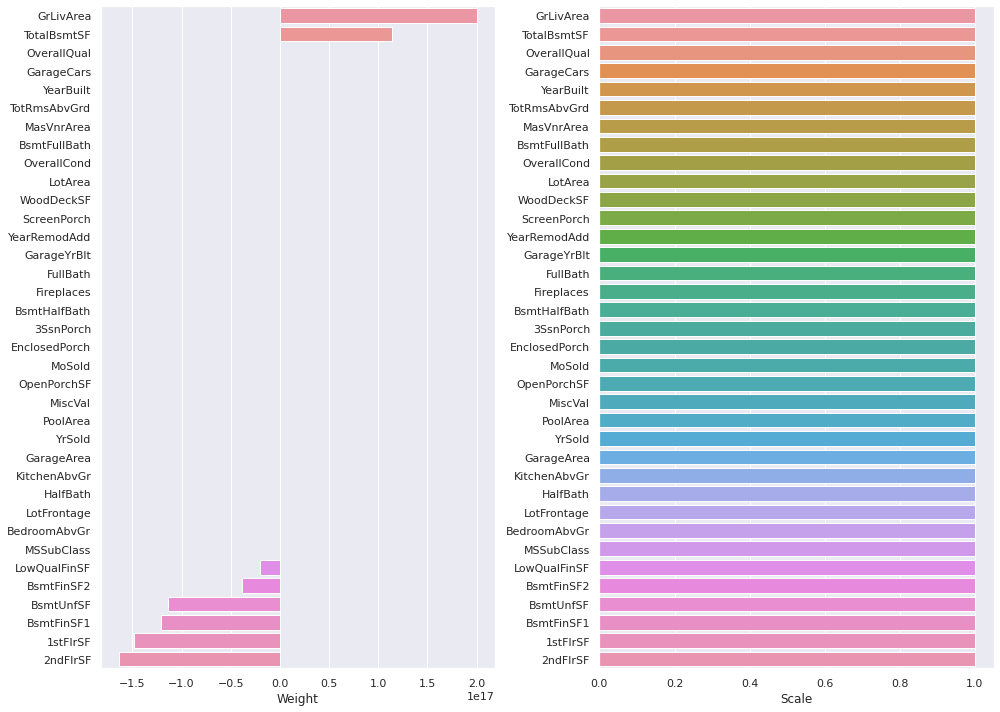

In [ ]:
scales = pd.Series(data=X_train_sc.std(axis=0), index=num_features)
show_weights(num_features, lr.coef_, scales)

In [ ]:
# Подберите коэффициент регуляризации alpha, воспользуясь GridSearchCV
# TO DO

from sklearn.model_selection import GridSearchCV

alpha_grid_search = GridSearchCV(lasso, 
                                {'alpha': np.arange(0.5, 200.1, 0.5)},
                               scoring=make_scorer(rmse, greater_is_better=False),
                               verbose=10)
alpha_grid_search.fit(X_train_sc, y_train_nf)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits
[CV 1/5; 1/400] START alpha=0.5.................................................
[CV 1/5; 1/400] END .............alpha=0.5;, score=-43973.744 total time=   0.1s
[CV 2/5; 1/400] START alpha=0.5.................................................
[CV 2/5; 1/400] END .............alpha=0.5;, score=-32583.517 total time=   0.1s
[CV 3/5; 1/400] START alpha=0.5.................................................
[CV 3/5; 1/400] END .............alpha=0.5;, score=-54438.718 total time=   0.0s
[CV 4/5; 1/400] START alpha=0.5.................................................
[CV 4/5; 1/400] END .............alpha=0.5;, score=-48830.524 total time=   0.1s
[CV 5/5; 1/400] START alpha=0.5.................................................
[CV 5/5; 1/400] END .............alpha=0.5;, score=-28336.621 total time=   0.1s
[CV 1/5; 2/400] START alpha=1.0.................................................
[CV 1/5; 2/400] END .............alpha=1.0;, 

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': array([  0.5,   1. ,   1.5,   2. ,   2.5,   3. ,   3.5,   4. ,   4.5,
         5. ,   5.5,   6. ,   6.5,   7. ,   7.5,   8. ,   8.5,   9. ,
         9.5,  10. ,  10.5,  11. ,  11.5,  12. ,  12.5,  13. ,  13.5,
        14. ,  14.5,  15. ,  15.5,  16. ,  16.5,  17. ,  17.5,  18. ,
        18.5,  19. ,  19.5,  20. ,  20.5,  21. ,  21.5,  22. ,  22.5,
        23. ,  23.5,  24. ,  24.5,  25. ,  25.5,  26. ,  26.5,  27. ,
        27.5,  28. ,  28.5,  29. ,  29.5,  30. ,  30.5,  31. ,  31.5,
        32. ,  32.5,  33. ,  33.5,  34. ,  34.5,...
       171.5, 172. , 172.5, 173. , 173.5, 174. , 174.5, 175. , 175.5,
       176. , 176.5, 177. , 177.5, 178. , 178.5, 179. , 179.5, 180. ,
       180.5, 181. , 181.5, 182. , 182.5, 183. , 183.5, 184. , 184.5,
       185. , 185.5, 186. , 186.5, 187. , 187.5, 188. , 188.5, 189. ,
       189.5, 190. , 190.5, 191. , 191.5, 192. , 192.5, 193. , 193.5,
       194. , 194.5, 195. , 195.5, 196. , 

In [ ]:
print(alpha_grid_search.best_params_)
print(alpha_grid_search.best_score_)
print(alpha_grid_search.best_estimator_)

alpha_grid_search.score(X_test_sc, y_test_nf)

{'alpha': 200.0}
-41361.6638233298
Lasso(alpha=200.0)


-31934.298333641887

In [ ]:
# Обучите линейную регрессию (LinearRegression, Ridge, Lasso) с подобранным коэффициентом регуляризации на числовых признаках из нашего датасета, воспользуясь классом Pipeline (не забывать про мастабирование признаков через StandardScaler)
# TO DO

from sklearn.pipeline import Pipeline

lasso_pipe = Pipeline([('scaler', StandardScaler()), ('lasso', linear_model.Lasso(alpha=200.0))])
lasso_pipe.fit(X_train_nf, y_train_nf)
print ("Lasso-Pipeline:", lasso_pipe.score(X_test_nf, y_test_nf))
print("RMSE:", rmse(lasso_pipe.predict(X_test_nf), y_test_nf))

Lasso-Pipeline: 0.8259259109898534
RMSE: 31934.298333641887


In [ ]:
categorical = list(X_train.dtypes[X_train.dtypes == "object"].index)
X_train[categorical] = X_train[categorical].fillna("NotGiven")
X_test[categorical] = X_test[categorical].fillna("NotGiven")
X_train[num_features] = X_train[num_features].fillna(method='ffill')
X_test[num_features] = X_test[num_features].fillna(method='ffill')

In [ ]:
X_train[categorical].sample(5)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
691,RL,Pave,NotGiven,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,WdShngl,HdBoard,HdBoard,BrkFace,Ex,TA,PConc,Ex,TA,Gd,GLQ,Unf,GasA,Ex,Y,SBrkr,Ex,Typ,Ex,Attchd,Fin,TA,TA,Y,NotGiven,NotGiven,NotGiven,WD,Normal
1094,RL,Pave,NotGiven,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,No,BLQ,Rec,GasA,Ex,Y,SBrkr,TA,Typ,NotGiven,Attchd,Fin,TA,TA,Y,NotGiven,NotGiven,NotGiven,WD,Normal
1187,RL,Pave,NotGiven,Reg,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,1Story,Gable,CompShg,ImStucc,ImStucc,None,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Fa,Attchd,RFn,TA,TA,Y,NotGiven,GdPrv,NotGiven,WD,Normal
422,RL,Pave,NotGiven,Reg,HLS,AllPub,Inside,Mod,Mitchel,Artery,Norm,1Fam,1Story,Hip,CompShg,HdBoard,HdBoard,None,TA,TA,CBlock,TA,TA,No,Unf,Unf,GasA,Ex,Y,FuseA,TA,Typ,NotGiven,Attchd,RFn,TA,TA,N,NotGiven,NotGiven,NotGiven,WD,Normal
818,RL,Pave,NotGiven,Reg,Lvl,AllPub,Inside,Gtl,ClearCr,Norm,Norm,1Fam,SLvl,Gable,CompShg,HdBoard,HdBoard,BrkFace,TA,TA,CBlock,TA,TA,Av,GLQ,Unf,GasA,Gd,Y,SBrkr,TA,Typ,NotGiven,Attchd,Unf,TA,TA,Y,NotGiven,MnPrv,NotGiven,WD,Normal


In [ ]:
# Закодируйте категориальные признаки числами с помощью OneHotEncoder и обучите модели на всех признаках

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

def create_column_transformer():
    return ColumnTransformer(
           [('scale', StandardScaler(), list(map(lambda x : X_train.columns.get_loc(x), num_features))),
            ('encode', OneHotEncoder(), list(map(lambda x : X.columns.get_loc(x), categorical)))])

X[categorical] = X[categorical].fillna("NotGiven")
X[num_features] = X[num_features].fillna(method='ffill')
column_transformer = create_column_transformer()
column_transformer.fit(X)

ColumnTransformer(transformers=[('scale', StandardScaler(),
                                 [0, 2, 3, 16, 17, 18, 19, 25, 33, 35, 36, 37,
                                  42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53,
                                  55, 58, 60, 61, 65, 66, 67, ...]),
                                ('encode', OneHotEncoder(),
                                 [1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                  20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31,
                                  32, 34, 38, 39, 40, 41, ...])])

In [ ]:
print("Size before One-Hot:", X_train.shape)
print("Size after One-Hot:", column_transformer.transform(X_train).shape)

Size before One-Hot: (1022, 79)
Size after One-Hot: (1022, 304)


In [ ]:
# Обучите линейную регрессию с l1 и l2 регуляризаторами

X_train_nf = column_transformer.transform(X_train)
X_test_nf = column_transformer.transform(X_test)

try:
    ridge = linear_model.Ridge()
    ridge.fit(X_train_nf, y_train_nf)
    print ("Ridge:", ridge.score(X_test_nf, y_test_nf))
    print ("Ridge RMSE:", np.sqrt(mean_squared_error(ridge.predict(X_test_nf), y_test_nf)))
except ValueError as e:
    print(e)
    
try:
    lasso = linear_model.Lasso()
    lasso.fit(X_train_nf, y_train_nf)
    print ("Lasso:", las.score(X_test_nf, y_test_nf))
    print ("Lasso RMSE:", np.sqrt(mean_squared_error(lasso.predict(X_test_nf), y_test_nf)))
except ValueError as e:
    print(e)

Ridge: 0.8823639523467743
Ridge RMSE: 26251.886927303298
Lasso: 0.8789670042475792
Lasso RMSE: 26628.224152185092


In [ ]:
lasso_pipe = Pipeline([('lasso', linear_model.Lasso())])
ridge_pipe = Pipeline([('ridge', linear_model.Ridge())])

ridge_pipe.fit(X_train_nf, y_train_nf)
print ("Ridge:", ridge_pipe.score(X_test_nf, y_test_nf))
print ("Ridge RMSE:", rmse(ridge_pipe.predict(X_test_nf), y_test_nf))

lasso_pipe.fit(X_train_nf, y_train_nf)
print ("Ridge:", lasso_pipe.score(X_test_nf, y_test_nf))
print ("Ridge RMSE:", rmse(lasso_pipe.predict(X_test_nf), y_test_nf))

Ridge: 0.8823639523467743
Ridge RMSE: 26251.88692730331
Ridge: 0.8789670042475792
Ridge RMSE: 26628.224152185096


In [ ]:
ridge_zeros = np.sum(ridge_pipe.steps[-1][-1].coef_ == 0)
lasso_zeros = np.sum(lasso_pipe.steps[-1][-1].coef_ == 0)
print("Zero weights in Ridge:", ridge_zeros)
print("Zero weights in Lasso:", lasso_zeros)

Zero weights in Ridge: 0
Zero weights in Lasso: 29


In [ ]:
# Подберите коэффициент регуляризации для всех моделей, воспользуясь GridSearchCV
# TO DO

gs = GridSearchCV(linear_model.Ridge(), 
                [{'alpha': np.arange(0.6, 100.5, 0.4)},],
                cv=5,
                scoring=make_scorer(rmse, greater_is_better=False)
                )
gs.fit(X_train_nf, y_train_nf)
print(gs.best_params_)
print(gs.best_score_)

{'alpha': 16.6}
-36810.37365844515


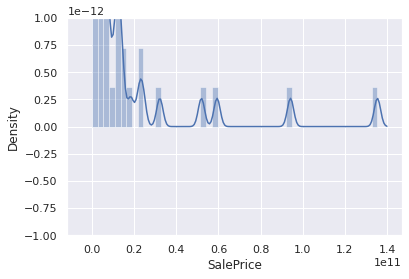

In [ ]:
error = (y_train_nf - lasso.predict(X_train_nf)) ** 2
sns.distplot(error)

Как видно из гистограммы, есть примеры с очень большими остатками. Попробуем их выбросить из обучающей выборки. Например, выбросим примеры, остаток у которых больше 0.95-квантили.

In [ ]:
# Выбросите из обучающей выборки примеры, остаток у которых больше 0.95-квантили и переобучите модели 
# TO DO

def stop_quantile(error, quantile, count):
    max = np.max(error)
    min = np.min(error)
    bins = np.linspace(min, max, count)
    
    error_classes = np.digitize(error, bins)
    nums, count = np.unique(error_classes, return_counts=True)
    sum = np.cumsum(count)
    percs = sum / sum[-1]
    
    fitting_bins = nums[percs < quantile]
    return np.isin(error_classes, fitting_bins)

stop = stop_quantile(error, 0.95, 200)

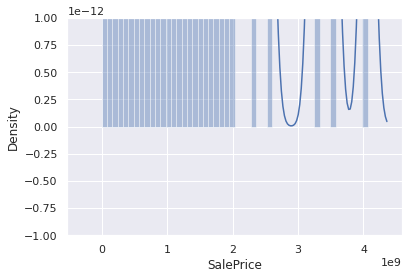

In [ ]:
error = (y_train_nf[stop] - ridge.predict(X_train_nf[stop])) ** 2
sns.distplot(error)

In [ ]:
# Получите скор по нашей метрике (RMSE) ниже значения 30000
# TO DO

ridge = linear_model.Ridge(alpha = 16)
ridge.fit(X_train_nf[stop], y_train_nf[stop])
y_pred = ridge.predict(X_test_nf)
print(rmse(y_test_nf, y_pred))

23989.23948506353
